<a href="https://colab.research.google.com/github/VighneshAlevoor/Machine_Learning_Projects/blob/master/XGBoost_Pima_Indian_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import pickle
from sklearn import datasets
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

In [2]:
data=pd.read_csv("pima-indians-diabetes.csv")
data

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skinfold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age,Is Diabetic
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [0]:
cols=['Plasma glucose concentration',
       'Diastolic blood pressure (mm Hg)', 'Triceps skinfold thickness (mm)',
       '2-Hour serum insulin (mu U/ml)',
       'Body mass index (weight in kg/(height in m)^2)',
       'Diabetes pedigree function', 'Age']

In [0]:
for col in cols:
  data[col]=data[col].replace(0,np.nan)

In [5]:
data.isna().sum()

Number of times pregnant                            0
Plasma glucose concentration                        5
Diastolic blood pressure (mm Hg)                   35
Triceps skinfold thickness (mm)                   227
2-Hour serum insulin (mu U/ml)                    374
Body mass index (weight in kg/(height in m)^2)     11
Diabetes pedigree function                          0
Age                                                 0
Is Diabetic                                         0
dtype: int64

In [0]:
data['Plasma glucose concentration']=data['Plasma glucose concentration'].fillna(data['Plasma glucose concentration'].mode()[0])
data['Diastolic blood pressure (mm Hg)']=data['Diastolic blood pressure (mm Hg)'].fillna(data['Diastolic blood pressure (mm Hg)'].mode()[0])
data['Triceps skinfold thickness (mm)']=data['Triceps skinfold thickness (mm)'].fillna(data['Triceps skinfold thickness (mm)'].mean())
data['2-Hour serum insulin (mu U/ml)']=data['2-Hour serum insulin (mu U/ml)'].fillna(data['2-Hour serum insulin (mu U/ml)'].mean())
data['Body mass index (weight in kg/(height in m)^2)']=data['Body mass index (weight in kg/(height in m)^2)'].fillna(data['Body mass index (weight in kg/(height in m)^2)'].mean())


In [7]:
data.isnull().sum()

Number of times pregnant                          0
Plasma glucose concentration                      0
Diastolic blood pressure (mm Hg)                  0
Triceps skinfold thickness (mm)                   0
2-Hour serum insulin (mu U/ml)                    0
Body mass index (weight in kg/(height in m)^2)    0
Diabetes pedigree function                        0
Age                                               0
Is Diabetic                                       0
dtype: int64

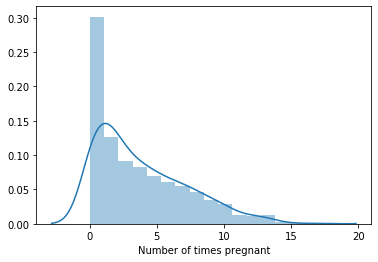

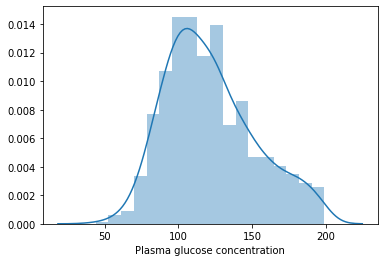

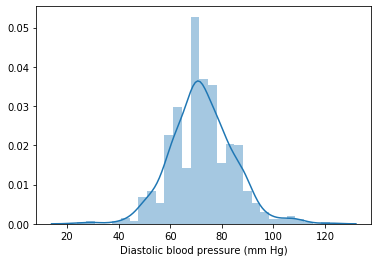

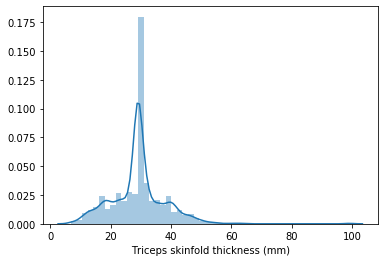

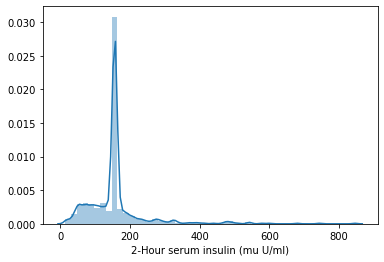

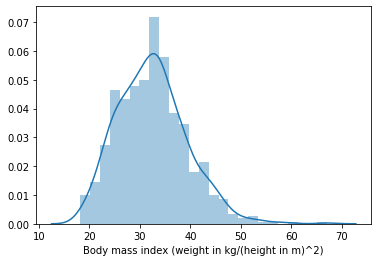

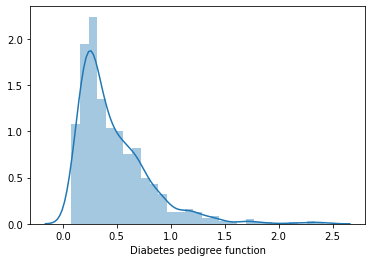

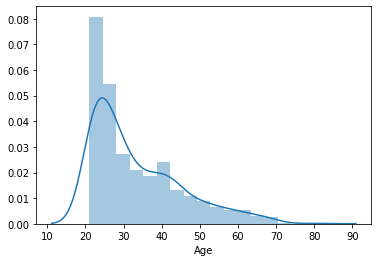

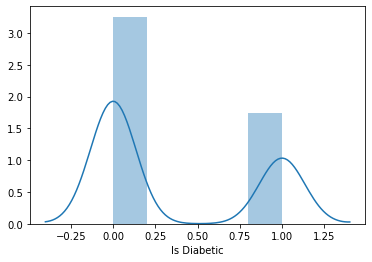

In [21]:
for col in data.columns:
  fig,ax=plt.subplots()
  sns.distplot(data[col])

In [0]:
x=data.drop(labels='Is Diabetic', axis=1)
y=data['Is Diabetic']

In [0]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(x)

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_data,y,test_size=0.25,random_state=45,)

In [33]:
model=XGBClassifier(objective='binary:logistic')
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [38]:
y_pred=model.predict(x_train)
score=accuracy_score(y_train,y_pred)
score

0.8975694444444444

In [37]:
y_pred=model.predict(x_test)
score=accuracy_score(y_test,y_pred)
score

0.75

In [0]:
#GridSearch:
param_grid={
    ' learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200]
}

In [0]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid, verbose=3)

In [44]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.741, total=   0.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.757, total=   0.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.730, total=   0.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.765, total=   0.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.757, total=   0.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.750, total=   0.0s
[CV]  learning_rate=1, max

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]   learning_rate=1, max_depth=3, n_estimators=100, score=0.707, total=   0.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=100 .................
[CV]   learning_rate=1, max_depth=3, n_estimators=100, score=0.809, total=   0.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=100 .................
[CV]   learning_rate=1, max_depth=3, n_estimators=100, score=0.722, total=   0.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=100 .................
[CV]   learning_rate=1, max_depth=3, n_estimators=100, score=0.783, total=   0.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=100 .................
[CV]   learning_rate=1, max_depth=3, n_estimators=100, score=0.809, total=   0.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=200 .................
[CV]   learning_rate=1, max_depth=3, n_estimators=200, score=0.716, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=200 .................
[CV]   learning_rate=1, max_depth=3, n_estimators=200, score=0.800, total=   0.1s


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   24.9s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={' learning_rate': [1, 0.5, 0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 10, 20],
                         'n_estimators': [10, 50,

In [45]:
grid.best_params_

{' learning_rate': 1, 'max_depth': 5, 'n_estimators': 50}

In [48]:
new_model=XGBClassifier(learning_rate= 1, max_depth= 5, n_estimators= 50)
new_model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=1,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
              n_estimators=50, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [50]:
y_pred=new_model.predict(x_test)
y_pred=[round(value) for value in y_pred ]
score=accuracy_score(y_test,y_pred)
score

0.6875

In [0]:
d=scaler.transform([[6,148,72,35,80,33.6,0.627,50]])

In [57]:
y=new_model.predict(d)
print(y)

[1]
